In [20]:
import numpy as np
import tensorflow as tf 
from tensorflow import keras 
from tensorflow.keras import layers
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [21]:
from keras.models import Sequential
from keras.layers import Dense,Conv2D,MaxPooling2D,Flatten

In [22]:
# data augmentation ,here we use the same data to generate the different orientations,different instances of the same data so we don't have to train the data seperately;cnn expects 4 dimensions,so we add the extra dummy dimension;validation data is always taken from the x train ,not from the x test;it decides when the training should be stopped;upto 50000 the data is given to x train , after 50k the data is given to x test;
# parameters in augmentation;
# convolution layer ; 32 ;(28,28,1) means grayscale image;

In [23]:
model=Sequential()

In [24]:
model.add(Conv2D(32, (3, 3), activation="relu", padding="same", input_shape=(28, 28, 1)))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dense(10, activation="softmax"))

In [25]:
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()

#scale it
x_train = x_train.astype("float32")/255
x_test = x_test.astype("float32")/255

x_train = np.expand_dims(x_train, -1)
x_test = np.expand_dims(x_test, -1)

x_train, x_val= x_train[:50000], x_train[50000:]
y_train, y_val= y_train[:50000], y_train[50000:]

In [26]:
datagen = ImageDataGenerator(
    rotation_range = 10,
    zoom_range = 0.1,
    width_shift_range = 0.1,
    height_shift_range=0.1,
    shear_range = 0.1, #Shearing is like making a square a not square thing(rhombus)
    horizontal_flip = False,
    vertical_flip = False,
)

In [27]:
#without data augmentation
model.compile(loss="sparse_categorical_crossentropy",optimizer="adam",metrics=["accuracy"])

history1=model.fit(x_train,y_train,batch_size=32,epochs=5,validation_data=(x_val,y_val))

#with data augmentation
model.compile(loss="sparse_categorical_crossentropy",optimizer="adam",metrics=["accuracy"])

history2=model.fit(datagen.flow(x_train,y_train,batch_size=32),epochs=5,validation_data=(x_val,y_val))

Epoch 1/5
1563/1563 [==============================] - 7s 4ms/step - loss: 0.2458 - accuracy: 0.9292 - val_loss: 0.1014 - val_accuracy: 0.9720
Epoch 2/5
1563/1563 [==============================] - 7s 4ms/step - loss: 0.0890 - accuracy: 0.9740 - val_loss: 0.0763 - val_accuracy: 0.9776
Epoch 3/5
1563/1563 [==============================] - 6s 4ms/step - loss: 0.0650 - accuracy: 0.9813 - val_loss: 0.0733 - val_accuracy: 0.9785
Epoch 4/5
1563/1563 [==============================] - 6s 4ms/step - loss: 0.0532 - accuracy: 0.9838 - val_loss: 0.0668 - val_accuracy: 0.9802
Epoch 5/5
1563/1563 [==============================] - 6s 4ms/step - loss: 0.0438 - accuracy: 0.9870 - val_loss: 0.0683 - val_accuracy: 0.9818
Epoch 1/5
1563/1563 [==============================] - 15s 10ms/step - loss: 0.3055 - accuracy: 0.9098 - val_loss: 0.1142 - val_accuracy: 0.9680
Epoch 2/5
1563/1563 [==============================] - 14s 9ms/step - loss: 0.2020 - accuracy: 0.9397 - val_loss: 0.1148 - val_accuracy: 0.9

In [28]:
#without data augmentation
model.evaluate(x_test,y_test)

#with data augmentation
model.evaluate(x_test,y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.1507 - accuracy: 0.9514


[0.1507302075624466, 0.9513999819755554]

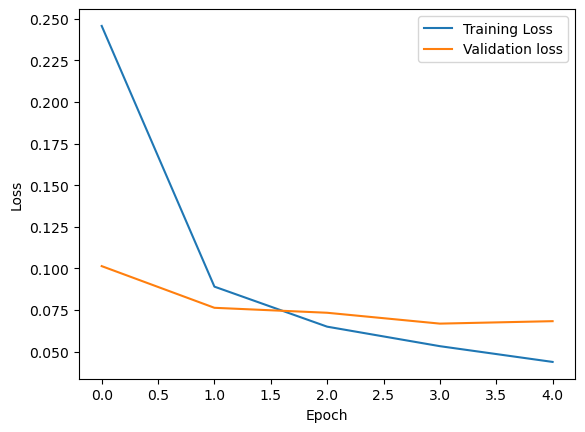

In [29]:
import matplotlib.pyplot as plt
#plot the training and validation loss
plt.plot(history1.history['loss'],label='Training Loss')
plt.plot(history1.history['val_loss'],label='Validation loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

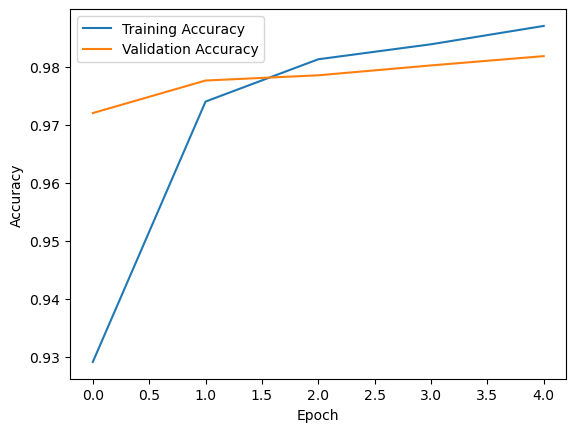

In [30]:
#plot the training and validation accuracy
plt.plot(history1.history['accuracy'],label='Training Accuracy')
plt.plot(history1.history['val_accuracy'],label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()